# **Анализ данных**

### Импорт библиотек

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from typing import List
from datetime import datetime

### Обработка датасета **traffic_volume_counts.csv**

In [258]:
traffic_df = pd.read_csv('./src/traffic_volume_counts.csv')

traffic_df.head()

,ID,SegmentID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/09/2012,20.0,10.0,11.0,...,104.0,105.0,147.0,120.0,91.0,83.0,74.0,49.0,42.0,42.0
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/10/2012,21.0,16.0,8.0,...,102.0,98.0,133.0,131.0,95.0,73.0,70.0,63.0,42.0,35.0
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/11/2012,27.0,14.0,6.0,...,115.0,115.0,130.0,143.0,106.0,89.0,68.0,64.0,56.0,43.0
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/12/2012,22.0,7.0,7.0,...,71.0,127.0,122.0,144.0,122.0,76.0,64.0,58.0,64.0,43.0
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,01/13/2012,31.0,17.0,7.0,...,113.0,126.0,133.0,135.0,102.0,106.0,58.0,58.0,55.0,54.0


In [259]:
dates = traffic_df['Date']
traffic_df['Date'] = [datetime(int(dates[x][-4:]),
                               int(dates[x][:2]),
                               int(dates[x][3:5])
                               ).date() for x in range(traffic_df.shape[0])]

traffic_df.head()

,ID,SegmentID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,1,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-09,20.0,10.0,11.0,...,104.0,105.0,147.0,120.0,91.0,83.0,74.0,49.0,42.0,42.0
1,2,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-10,21.0,16.0,8.0,...,102.0,98.0,133.0,131.0,95.0,73.0,70.0,63.0,42.0,35.0
2,3,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-11,27.0,14.0,6.0,...,115.0,115.0,130.0,143.0,106.0,89.0,68.0,64.0,56.0,43.0
3,4,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-12,22.0,7.0,7.0,...,71.0,127.0,122.0,144.0,122.0,76.0,64.0,58.0,64.0,43.0
4,5,15540,BEACH STREET,UNION PLACE,VAN DUZER STREET,NB,2012-01-13,31.0,17.0,7.0,...,113.0,126.0,133.0,135.0,102.0,106.0,58.0,58.0,55.0,54.0


In [260]:
traffic_res = pd.concat([traffic_df['Date'], traffic_df.iloc[:, 7:].sum(axis=1)], axis=1)
traffic_res.columns = ['date', 'sum_car']

traffic_res.head()

,date,sum_car
0,2012-01-09,1529.0
1,2012-01-10,1424.0
2,2012-01-11,1574.0
3,2012-01-12,1559.0
4,2012-01-13,1659.0


### Обработка датасета **weather.csv**

In [261]:
weather_df = pd.read_csv('./src/weather.csv')

weather_df.head()

,pickup_datetime,tempm,tempi,dewptm,dewpti,hum,wspdm,wspdi,wgustm,wgusti,...,precipm,precipi,conds,icon,fog,rain,snow,hail,thunder,tornado
0,2015-12-31 00:15:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,...,0.5,0.02,Light Rain,rain,0,1,0,0,0,0
1,2015-12-31 00:42:00,7.8,46.0,6.1,43.0,89.0,7.4,4.6,NaN,NaN,...,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0
2,2015-12-31 00:51:00,7.8,46.0,6.1,43.0,89.0,5.6,3.5,NaN,NaN,...,0.8,0.03,Overcast,cloudy,0,0,0,0,0,0
3,2015-12-31 01:51:00,7.2,45.0,5.6,42.1,90.0,7.4,4.6,NaN,NaN,...,0.3,0.01,Overcast,cloudy,0,0,0,0,0,0
4,2015-12-31 02:51:00,7.2,45.0,5.6,42.1,90.0,0.0,0.0,NaN,NaN,...,NaN,NaN,Overcast,cloudy,0,0,0,0,0,0


In [262]:
dates = weather_df['pickup_datetime']
dates = [datetime(int(dates[x][:4]),  # YYYY
                  int(dates[x][5:7]),   # MM
                  int(dates[x][8:10])   # DD
                  ).date() for x in range(weather_df.shape[0])]

weather_df['pickup_datetime'] = dates
weather_res = weather_df.dropna(subset='precipm')[['pickup_datetime', 'precipm', 'tempm']]
weather_res.columns = ['date', 'precipm', 'average_temp']

weather_res.head()

,date,precipm,average_temp
0,2015-12-31,0.5,7.8
1,2015-12-31,0.8,7.8
2,2015-12-31,0.8,7.8
3,2015-12-31,0.3,7.2
69,2016-01-02,0.0,14.4


### Первое объединение таблиц (**weather + traffic**)

In [372]:
joined_df = weather_res.join(traffic_res.set_index('date'), on='date').\
                        dropna().\
                        reset_index(drop=True).\
                        set_index('date')

joined_df = pd.concat(
    [
        joined_df['precipm'].groupby('date').mean(),
        joined_df['average_temp'].groupby('date').mean(),
        joined_df['sum_car'].groupby('date').sum()
    ],
    axis=1
)

joined_df

,precipm,average_temp,sum_car
date,,,
2016-02-03,0.766667,11.066667,417420.0
2016-02-04,0.557143,11.571429,331674.0
2016-02-05,0.000000,13.900000,47243.0
2016-02-29,0.433333,9.800000,343098.0
2016-03-02,1.613043,12.839130,2683686.0
2016-03-04,0.650000,5.975000,476248.0
2016-03-05,1.162857,11.471429,4777990.0
2016-03-06,0.222222,17.777778,1092762.0
2016-03-12,0.000000,6.100000,29172.0


### Обработка датасета **yellow_tripdata**

In [374]:
tripdata_1 = pd.read_csv('./src/yellow_tripdata_2015-01.csv')
tripdata_2 = pd.read_csv('./src/yellow_tripdata_2016-01.csv')
tripdata_3 = pd.read_csv('./src/yellow_tripdata_2016-02.csv')
tripdata_4 = pd.read_csv('./src/yellow_tripdata_2016-03.csv')

tripdata = pd.concat([tripdata_1, tripdata_2, tripdata_3, tripdata_4], axis=0)
del tripdata_1, tripdata_2, tripdata_3, tripdata_4

tripdata = tripdata[['tpep_pickup_datetime', 'total_amount']]

tripdata.head()

,tpep_pickup_datetime,total_amount
0,2015-01-15 19:05:39,17.05
1,2015-01-10 20:33:38,17.80
2,2015-01-10 20:33:38,10.80
3,2015-01-10 20:33:39,4.80
4,2015-01-10 20:33:39,16.30


In [375]:
dates = tripdata['tpep_pickup_datetime'].values
dates = [datetime(int(dates[x][:4]),  # YYYY
          int(dates[x][5:7]),   # MM
          int(dates[x][8:10])   # DD
          ).date() for x in range(tripdata.shape[0])]

tripdata['tpep_pickup_datetime'] = dates
tripdata.columns = ['date', 'sum_trip']
tripdata = tripdata.groupby('date').count()

tripdata.head()

,date,sum_trip
0,2015-01-15,17.05
1,2015-01-10,17.80
2,2015-01-10,10.80
3,2015-01-10,4.80
4,2015-01-10,16.30


### Финальный **join**

In [ ]:
final_df = joined_df.join(tripdata, on='date').dropna(subset='sum_trip')
final_df.to_csv('./output/final_table.csv', sep=',')

final_df

In [10]:
final_df = pd.read_csv('./output/final_table.csv', index_col='date')

final_df

,precipm,average_temp,sum_car,sum_trip
date,,,,
2016-02-03,0.766667,11.066667,417420.0,372021.0
2016-02-04,0.557143,11.571429,331674.0,394699.0
2016-02-05,0.000000,13.900000,47243.0,409453.0
2016-02-29,0.433333,9.800000,343098.0,347834.0
2016-03-02,1.613043,12.839130,2683686.0,407187.0
2016-03-04,0.650000,5.975000,476248.0,434165.0
2016-03-05,1.162857,11.471429,4777990.0,451262.0
2016-03-06,0.222222,17.777778,1092762.0,385103.0
2016-03-12,0.000000,6.100000,29172.0,442084.0


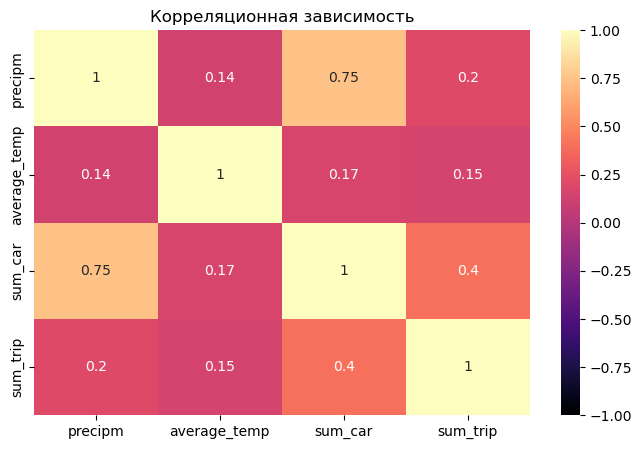

In [11]:
import seaborn as sns

fig = plt.figure()
fig.set_size_inches(8, 5)

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Корреляционная зависимость')
sns.heatmap(final_df.reset_index().drop('date', axis=1).corr(),
            vmin=-1,
            vmax=1,
            cmap='magma',
            annot=True)
plt.show()